<a href="https://colab.research.google.com/github/ManuShukla/ISL_YOLOv5/blob/main/BLIP2_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
from PIL import Image
from urllib.request import urlopen

In [ ]:
#load processor and main model
#our pipeline has 2 components, a processor and a model
#processor is like tokenizer of LMs, it converts unstructured input like image/text
#to a format that a model generally expects
blip_processor=AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b",torch_dtype=torch.float16)

#send the model to gpu to speed up inference
device="cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
  )
  (qf

In [ ]:
model.vision_model

Blip2VisionModel(
  (embeddings): Blip2VisionEmbeddings(
    (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
  )
  (encoder): Blip2Encoder(
    (layers): ModuleList(
      (0-38): 39 x Blip2EncoderLayer(
        (self_attn): Blip2Attention(
          (qkv): Linear(in_features=1408, out_features=4224, bias=True)
          (projection): Linear(in_features=1408, out_features=1408, bias=True)
        )
        (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        (mlp): Blip2MLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1408, out_features=6144, bias=True)
          (fc2): Linear(in_features=6144, out_features=1408, bias=True)
        )
        (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
)

In [ ]:
model.language_model

OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50304, 2560, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 2560)
      (final_layer_norm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0-31): 32 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (out_proj): Linear(in_features=2560, out_features=2560, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear(in_features=10240, out_features=2560, bias=True)
          (final_layer_norm): Laye

In [ ]:
#lets see what a processor does to an image
#load image of a supercar
car_path="https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/chapter09/images/car.png"
jadu_path="/content/jadu.jpeg"
image=Image.open(urlopen(car_path)).convert("RGB")
image1=Image.open(jadu_path).convert("RGB")

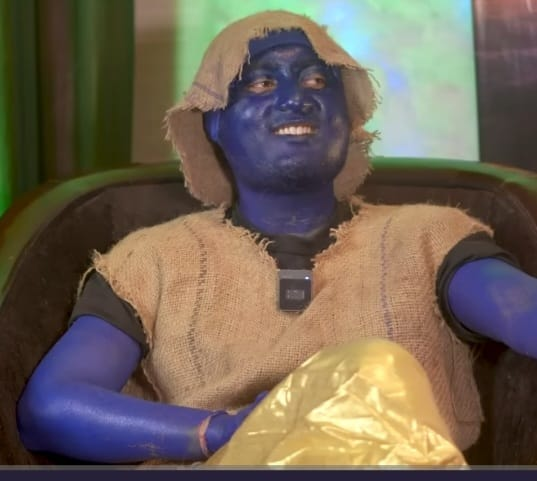

In [ ]:
image1

In [ ]:
#preprocess the image
inputs=blip_processor(image,return_tensors="pt").to(device,torch.float16)
inputs["pixel_values"].shape

torch.Size([1, 3, 224, 224])

In [ ]:
#access the tokenizer for text used by the processor : GPT2Tokenizer
blip_processor.tokenizer

GPT2TokenizerFast(name_or_path='Salesforce/blip2-opt-2.7b', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50265: AddedToken("<image>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
#lets go over how this tokenizer works: GPT2Tokenizer
#preprocess the text
text="Her vocalization was remarkably melodic"
token_ids=blip_processor(image,text=text,return_tensors="pt")
token_ids=token_ids.to(device,torch.float16)["input_ids"][0]

#convert input ids back to tokens
tokens=blip_processor.tokenizer.convert_ids_to_tokens(token_ids)
tokens
#the G here is actually space, code point 32, moved by 256 to make it printable, 288 is G dash

['<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '</s>',
 'Her',
 'Ġvocal',
 'ization',
 'Ġwas',
 'Ġremarkably',
 'Ġmel',
 'odic']

In [ ]:
#replace G with underscore
tokens=[token.replace("Ġ","_") for token in tokens]
tokens

['<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '<image>',
 '</s>',
 'Her',
 '_vocal',
 'ization',
 '_was',
 '_remarkably',
 '_mel',
 'odic']

Usecase 1: Generating captions for images

Captioning:

1.   convert image to pixel values that model can read
2.   pass pixel values to BLIP-2 to be converted into soft visual prompts that the LLM can use to decide on a proper caption

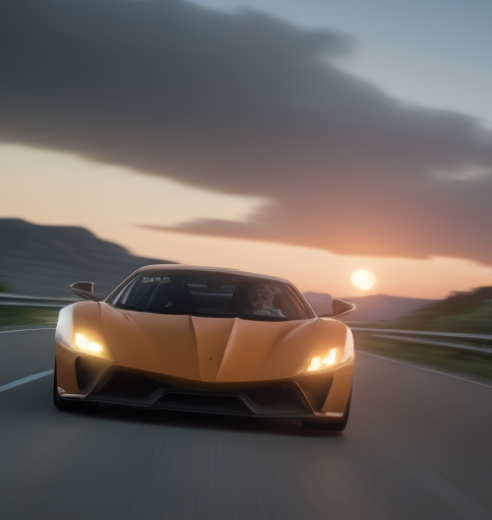

In [ ]:
#load an ai generated image of a supercar
image=Image.open(urlopen(car_path)).convert("RGB")

#convert an image into inputs and preprocess it
inputs = blip_processor(image,return_tensors="pt").to(device,torch.float16)
image

In [ ]:
#convert the image into token ids using BLIP-2 model
#after this convert the IDs into text(generated caption)

#generate image ids to be passed to the decoder(LLM)
generated_ids=model.generate(**inputs,max_new_tokens=20)

#generate text from the image ids
generated_text=blip_processor.batch_decode(generated_ids,skip_special_tokens=True)

generated_text=generated_text[0].strip()
generated_text

'an orange supercar driving on the road at sunset'

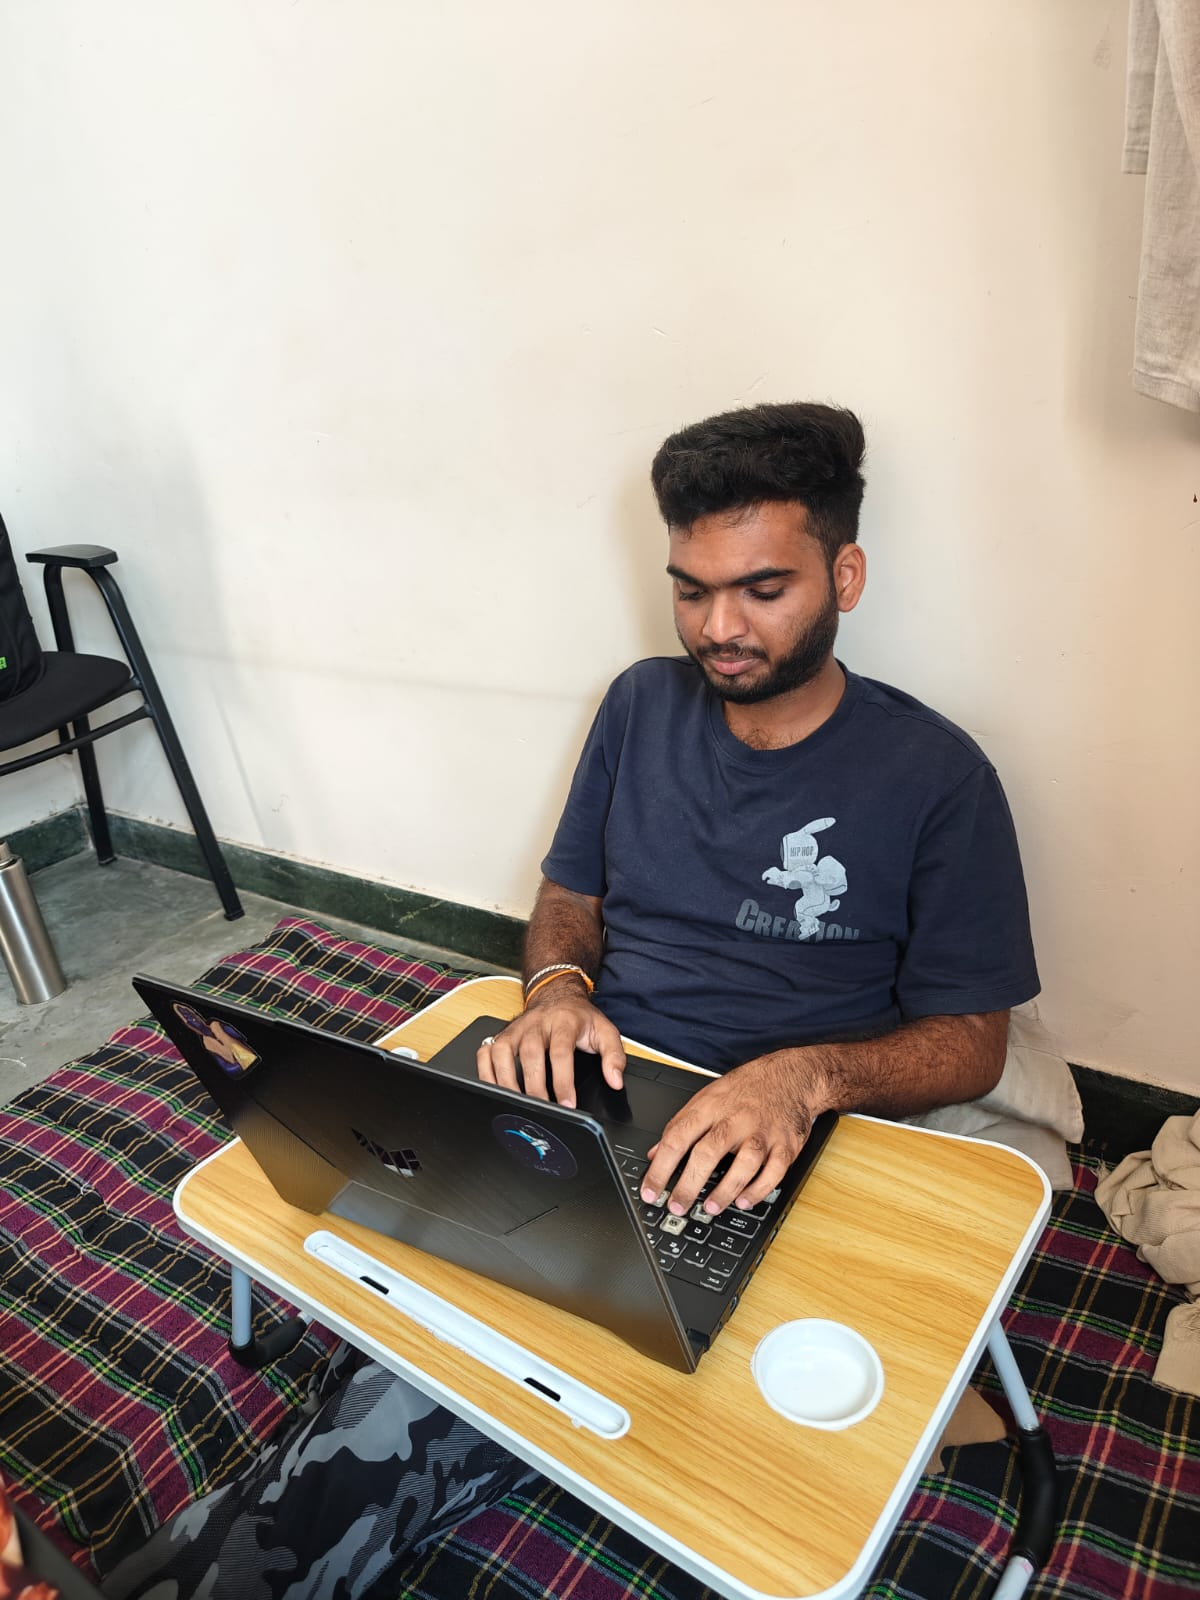

In [ ]:
image_jadu=Image.open(jadu_path).convert("RGB")
inputs_jadu = blip_processor(image_jadu,return_tensors="pt").to(device,torch.float16)
image_jadu

In [ ]:
generated_ids=model.generate(**inputs_jadu,max_new_tokens=20)
generated_text=blip_processor.batch_decode(generated_ids,skip_special_tokens=True)
generated_text=generated_text[0].strip()
generated_text

'a man sitting on a bed with a laptop'

model might perform poorly on domain specific images like certain cartoon characters or imaginary creations as it was trained on largely public data

Rorschach image

In [ ]:
#load rorschach image
#url = "https://upload.wikimedia.org/wikipedia/commons/7/70/Rorschach_blot_01.jpg"
image=Image.open("/content/rorschach.jpg").convert("RGB")

#generate caption
inputs=blip_processor(image,return_tensors="pt").to(device,torch.float16)
generated_ids=model.generate(**inputs,max_new_tokens=20)
generated_text=blip_processor.batch_decode(generated_ids,skip_special_tokens=True)
generated_text=generated_text[0].strip()
generated_text

'a black and white ink drawing of a bat'

Usecase 2: multimodal chat based
visual question answering
give image and ask question about that image

In [ ]:
#load image of the car and ask BLIP-2 to describe it

image=Image.open(urlopen(car_path)).convert("RGB")


In [ ]:
#to perform visual QA we need to provide prompt too
#without prompt BLIP-2 will return just the previous caption

#visual question answering
#this will give just the previous output
prompt="Question: Write down what you see in this picture.Answer:A sports car driving on the road at sunset. Questions: How much does this car cost? Answer:"

#process both the image and the prompt
inputs=blip_processor(image,text=prompt,return_tensors="pt").to(device,torch.float16)

#generate text
generated_ids=model.generate(**inputs,max_new_tokens=30)
generated_text=blip_processor.batch_decode(generated_ids,skip_special_tokens=True)
generated_text=generated_text[0].strip()
generated_text

'Question: Write down what you see in this picture.Answer:A sports car driving on the road at sunset. Questions: How much does this car cost? Answer: $1,000,000'

In [ ]:
from IPython.display import HTML,display
import ipywidgets as widgets

In [ ]:


# --- Chat handler ---
def text_eventhandler(change):
    question = change["new"]
    if not question:   # early stop for empty input
        return

    # clear the input box
    change["owner"].value = ""

    # build prompt with capped memory (last 5 exchanges)
    context_memory = memory[-5:]
    if not context_memory:
        prompt = f" Question(in english): {question} Answer(in english): "
    else:
        template = "Question(in english): {} Answer(in english): {}"
        past = " ".join([template.format(q, a) for q, a in context_memory])
        prompt = past + f" Question(in english): {question} Answer(in english): "

    # model inference
    inputs = blip_processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
    generated_ids = model.generate(**inputs, max_new_tokens=100)

    # decode output
    generated_text = blip_processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

    # clean up answer if "Answer:" exists
    if "Answer:" in generated_text:
        generated_text = generated_text.split("Answer:")[-1].strip()

    # update memory
    memory.append((question, generated_text))

    # display in output widget
    output.append_display_data(HTML(f"<b>USER: </b> {question}"))
    output.append_display_data(HTML(f"<b>BLIP-2: </b> {generated_text}"))
    output.append_display_data(HTML("<br>"))

# --- Widgets ---
in_text = widgets.Text(placeholder="Type your question and press Enter...")
in_text.continuous_update = False
in_text.observe(text_eventhandler, "value")

send_btn = widgets.Button(description="Send", button_style="info")

def send_btn_click(b):
    text_eventhandler({"new": in_text.value, "owner": in_text})
send_btn.on_click(send_btn_click)

output = widgets.Output()
memory = []

# --- Display Chat UI ---
display(
    widgets.VBox(
        children=[output, widgets.HBox([in_text, send_btn])],
        layout=widgets.Layout(display="inline-flex", flex_flow="column-reverse"),
    )
)


In [35]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --to notebook --inplace BLIP2_01.ipynb

[NbConvertApp] WARNING | pattern 'BLIP2_01.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Ex